In [115]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import re 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv


In [116]:
t_df=pd.read_csv('../input/twitter-entity-sentiment-analysis/twitter_training.csv', sep=',', names=['Tweet_ID','Entity','Sentiment','Tweet_content'])

v_df=pd.read_csv('../input/twitter-entity-sentiment-analysis/twitter_validation.csv', sep=',', names=['Tweet_ID','Entity','Sentiment','Tweet_content'])
t_df.head()


,Tweet_ID,Entity,Sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [117]:
v_df.head()

,Tweet_ID,Entity,Sentiment,Tweet_content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


Negative      30.183980
Positive      27.894272
Neutral       24.527999
Irrelevant    17.393749
Name: Sentiment, dtype: float64


([<matplotlib.patches.Wedge at 0x7fe0f98b0610>,
 [Text(-0.8936408809046303, 0.6414093669225578, 'Negative'),
  Text(-0.39649770564254117, -1.0260553442286633, 'Positive'),
  Text(1.0532293937999033, -0.3173449921392938, 'Neutral'),
  Text(0.5716146417662045, 0.9398173765782871, 'Irrelevant')],
 [Text(-0.4874404804934347, 0.3498596546850315, '30.2%'),
  Text(-0.21627147580502246, -0.5596665513974527, '27.9%'),
  Text(0.5744887602544927, -0.17309726843961476, '24.5%'),
  Text(0.31178980459974787, 0.5126276599517929, '17.4%')])

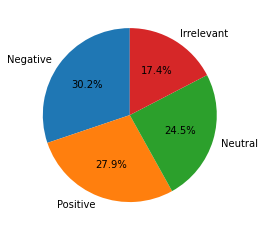

In [118]:
f=t_df['Sentiment'].value_counts()
print((f*100)/f.sum())
plt.pie(f,labels=['Negative','Positive','Neutral','Irrelevant'],autopct='%1.1f%%',startangle=90)

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

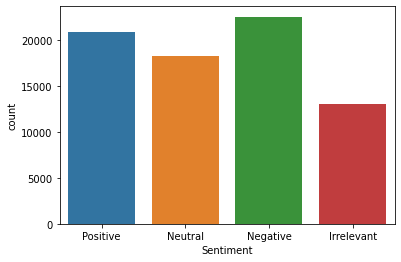

In [119]:
import seaborn as sns 
sns.countplot(x=t_df['Sentiment'])

In [120]:
ff=t_df.groupby(['Entity', 'Sentiment']).Sentiment.count().unstack()
ff

Sentiment,Irrelevant,Negative,Neutral,Positive
Entity,,,,
Amazon,192,576,1236,312
ApexLegends,192,600,942,642
AssassinsCreed,264,378,156,1446
Battlefield,918,474,360,594
Borderlands,240,426,600,1020
CS-GO,636,348,552,768
CallOfDuty,672,894,378,450
CallOfDutyBlackopsColdWar,576,576,360,864
Cyberpunk2077,480,390,468,966


In [121]:
t_df.duplicated().sum()

2700

In [122]:
t_df.drop_duplicates(inplace=True)

In [123]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71982 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       71982 non-null  int64 
 1   Entity         71982 non-null  object
 2   Sentiment      71982 non-null  object
 3   Tweet_content  71656 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [124]:
t_df.isnull().sum()

Tweet_ID           0
Entity             0
Sentiment          0
Tweet_content    326
dtype: int64

In [125]:
t_df.dropna(axis=0, inplace=True)

In [126]:
v_df.isnull().sum()

Tweet_ID         0
Entity           0
Sentiment        0
Tweet_content    0
dtype: int64

In [127]:
REPLACE_WITH_SPACE = re.compile("(@)")
SPACE = " "
from nltk.corpus import stopwords
english_stop_words = stopwords.words('english')
from nltk.stem.porter import PorterStemmer
#1
def reviews(reviews):  
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line.lower()) for line in reviews]
    
    return reviews
#2
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split()  if word not in english_stop_words]))
    return removed_stop_words
#3
def get_stemmed_text(corpus):
    stemmer = PorterStemmer()

    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]


In [128]:
tweet_t  = t_df["Tweet_content"]
tweet_v =v_df["Tweet_content"]
target =t_df['Sentiment']
#1
reviewt = reviews(tweet_t)
reviewv = reviews(tweet_v)
#2
no_stop_words_t = remove_stop_words(reviewt)
no_stop_words_v = remove_stop_words(reviewv)
#3
stemmed_reviews_t = get_stemmed_text(no_stop_words_t)
stemmed_reviews_test = get_stemmed_text(no_stop_words_v)

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(stemmed_reviews_t)
X = tfidf_vectorizer.transform(stemmed_reviews_t)
X_test = tfidf_vectorizer.transform(stemmed_reviews_test)

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, target, train_size = 0.8)

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

text_classifier = RandomForestClassifier(n_estimators=50, random_state=0)
text_classifier.fit(X_train, y_train)

y_pred=text_classifier.predict(X_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.96      0.86      0.91      2543
    Negative       0.92      0.93      0.92      4302
     Neutral       0.94      0.90      0.92      3524
    Positive       0.87      0.94      0.90      3963

    accuracy                           0.91     14332
   macro avg       0.92      0.91      0.91     14332
weighted avg       0.92      0.91      0.91     14332

